<a href="https://colab.research.google.com/github/fabioVitorTavares/EFC1-GCC253---Complexidade-e-Projeto-de-Algoritmos/blob/main/REDES_NEURAIS_ARTIFICIAIS_ATIVIDADE_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoidal(x):
    return 1 / (1 + np.exp(-x))

def relux(x): 
    if x >= 0:
        return x
    return 0

#1. Escreva uma func ̧ao para simular a rede neural.

In [14]:
def rede_neural(entradas, pesos):
    soma = 0
    for i in range(len(entradas)):
        j = entradas[i]
        w = pesos[i]
        soma += j**(w**i) * sigmoidal(j)        
        
    
    return sigmoidal(soma)

#2. Deduza as equações para calcular o valor do erro por neuronio para todos os neurônios. Escreva a funcão que, dada uma amostra de treinamento e os pesos da rede calcula delta i para cada neuronio.

In [15]:
def delta_i(x, y, pesos):
    a1 = np.dot(pesos[0], x)
    z1 = sigmoidal(a1)
    
    a2 = np.dot(pesos[1], z1)
    y_hat = sigmoidal(a2)
    
    variacao_saida = (y_hat - y) * y_hat * (1 - y_hat)
    
    variacao_interna = np.dot(pesos[1], variacao_saida) * z1 * (1 - z1)
    
    variacao_entrada = np.dot(pesos[0], variacao_interna) * x * (1 - x)
    
    return variacao_entrada, variacao_interna, variacao_saida

#3. Considerando que a matriz de pesos e:

In [16]:
pesos = [
    [3,0,0,0],
    [-4,1,0,0],
    [-1,-3,0,0],
    [0,0,2,-10],
]

x = [0.0, 1.0]
y = [0.5, 0.1]
erros = []
for i in range(len(x)):
    erros.append(delta_i(x[i], y[i], pesos))

print(erros)

[(0.0, array([ 0.04736511, -0.01184128,  0.        ,  0.        ]), -0.04736510639237634), (0.0, array([ 0.00039777, -0.0005503 ,  0.        ,  0.        ]), -0.0022011859787327915)]


#4. Escreva uma função para treinar uma rede neural usando o algoritmo gradient descent.

In [35]:
def gradient_descent(X, y, num_neuronios, taxa_aprendizado, num_epocas):

    num_amostras, num_caracteristicas = X.shape
    pesos = np.random.rand(num_caracteristicas, num_neuronios)
    erros = []
    for epoca in range(num_epocas):
        soma_erros = 0
        for i in range(num_amostras):
            entrada = X[i]
            saida = np.dot(entrada, pesos)
            
            erro = saida - y[i]
            soma_erros += erro
            delta_pesos = taxa_aprendizado * erro * entrada.reshape(-1, 1)
            pesos -= delta_pesos

        
        erros.append(soma_erros/num_epocas)
    return pesos, erros


#5. Use uma função para treinar a rede com as seguintes amostras de dados:



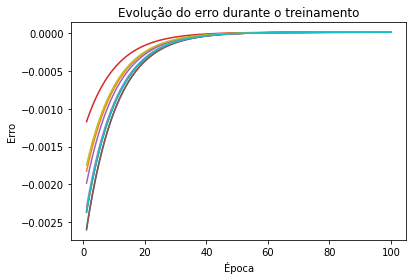

Pesos aprendidos pela rede neural:
[[-0.59889166 -0.59891014 -0.59889681 -0.59892622 -0.59890629 -0.59889112
  -0.59889865 -0.59889705 -0.5989121  -0.59889762]]


In [40]:
x = np.array([-3.0, -2.0, -1.0, -0.5, 0.0, 0.5, 1.0, 1.5, 2.0, 3.0])
y = np.array([0.73212, 0.7339, 0.7838, 0.8903, 0.9820, 0.8114, 0.5937, 0.5219, 0.5049, 0.5002])

x_norm = (x - np.mean(x)) / np.std(x)
y_norm = (y - np.mean(y)) / np.std(y)

num_neuronios = 10
taxa_aprendizado = 0.01
num_epocas = 100
epocas = np.array(list(range(1, 101)))
pesos, erros = gradient_descent(x_norm.reshape(-1, 1), y_norm, num_neuronios, taxa_aprendizado, num_epocas)

plt.plot(epocas, erros)
plt.xlabel('Época')
plt.ylabel('Erro')
plt.title('Evolução do erro durante o treinamento')
plt.show()
print("Pesos aprendidos pela rede neural:")
print(pesos)